```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
2. https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/

```

# Dimensionality Reduction
Imagine we have a dataset with 3-variables. In order to represent each of those points, we have used 3 values – one for each dimension. In some cases, we can find a 2D plane very close to the data. Something like this:

<img src="images/dimensionality_reduction_3d-2d.png" alt="" style="width: 650px;"/>

This plane is two-dimensional, so it is defined by two variables. As you can see, not all points lie on this plane, but we can say that they approximately do.

Linear algebraic operations allow us to transform this 3-dimensional data into 2-dimensional data. Of course, some information is lost, but the total number of features is reduced.

In this way, instead of having 3 variables, we reduce the problem to 2 variables. In fact, if you have 50 variables, you can reduce them to 40, or 20, or even 10. And that’s where dimensionality reduction has the biggest impact.

## Principal Component Analysis (PCA)
**Principal Components Analysis** or **PCA** dates all the way back to the early work of Pearson in 1901. Nowadays, however, it’s commonly used in preprocessing. PCA is often employed prior to modeling and clustering, in particular, to reduce the number of variables.

To define it more formally, PCA tries to find the best possible subspace which explains most of the variance in the data. It transforms our initial features into so-called `components`. These components are basically new variables, derived from the original ones, and they are usually displayed in order of importance. At the end of the PCA analysis, we aim to choose only a few components, while preserving as much of the original information as possible.

[Principal Component Analysis (or PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is a popular dimensionality reduction technique you can use to avoid `the curse of dimensionality` (if your data has too many features and possibly not enough data points). A property of PCA is that you can choose the number of `dimensions` or `principal components` to see in the transformed result.

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Use PCA and select 3 principal components

In [4]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

In [5]:
# Load data
# target = 'class'
df = get_dataset('sonar')
df.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
y = df[['class']]
X = df.drop(columns='class')

In [8]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [9]:
# Feature extraction
pca = PCA(n_components=3)
pca_fit = pca.fit(X_std)

In [10]:
# Summarize components
print(f"Explained Variance by feature: {pca_fit.explained_variance_ratio_}")

Explained Variance by feature: [0.20346557 0.18897216 0.08549989]


In [11]:
print(f"Explained Variance: {pca_fit.explained_variance_ratio_.sum()}")

Explained Variance: 0.47793761535378304


You can see that the transformed dataset (3 principal components) bare little resemblance to the source data. These 3 components together explain 0.48 (0.20346557+0.18897216+0.08549989) of the variability of the data.

In [12]:
print(pca_fit.components_)

[[ 0.13637827  0.14605308  0.11572088  0.09390192  0.05534548  0.05175506
   0.06277561  0.10505479  0.09819727  0.08792121  0.05737586  0.0308139
   0.02096966  0.00565212 -0.00499061 -0.01605679 -0.05123473 -0.08379166
  -0.08118428 -0.06291526 -0.07874026 -0.12946268 -0.14856242 -0.15392681
  -0.1574534  -0.14694989 -0.12488242 -0.04932885 -0.0106657   0.06581839
   0.09111568  0.11181154  0.12645906  0.14392336  0.15326044  0.15280375
   0.14977473  0.18505684  0.18878735  0.17984796  0.2019245   0.19820399
   0.18461869  0.17019463  0.20081527  0.1992613   0.1770997   0.18409097
   0.17550399  0.15881935  0.14528385  0.13967971  0.1237217   0.11516458
   0.12757326  0.11365105  0.11225071  0.134271    0.14375632  0.11784172]
 [ 0.12230469  0.13107841  0.14241443  0.15442073  0.16045643  0.14585445
   0.14089145  0.13486377  0.11915595  0.12444406  0.15768295  0.135537
   0.1842973   0.23177202  0.2379487   0.23845089  0.22249418  0.21338807
   0.21661646  0.20977192  0.18768796  0

### How to choose the right number of components

In [13]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [14]:
from sklearn.decomposition import PCA

pca = PCA() 
pca.fit(X_std) # creates as many components as features in the data set

PCA()

In [15]:
evr = pca.explained_variance_ratio_
evr

array([2.03465567e-01, 1.88972164e-01, 8.54998852e-02, 5.67919035e-02,
       5.00707995e-02, 4.06499523e-02, 3.27899181e-02, 3.04646584e-02,
       2.56596098e-02, 2.49110230e-02, 2.07528022e-02, 1.90198997e-02,
       1.74697957e-02, 1.53848421e-02, 1.42779702e-02, 1.36095862e-02,
       1.23460825e-02, 1.16864603e-02, 1.03077448e-02, 9.79001875e-03,
       9.44079287e-03, 8.87560657e-03, 8.39874096e-03, 7.70838079e-03,
       7.21929579e-03, 6.96370919e-03, 6.15371046e-03, 5.31600397e-03,
       5.24714746e-03, 4.95397252e-03, 4.76203236e-03, 4.36167127e-03,
       3.72450789e-03, 3.36705265e-03, 3.10510516e-03, 3.03165574e-03,
       2.87697343e-03, 2.44574090e-03, 2.19495027e-03, 2.10115014e-03,
       1.84558556e-03, 1.58235827e-03, 1.36752681e-03, 1.25733376e-03,
       1.02731989e-03, 9.49170287e-04, 9.38182230e-04, 7.07668927e-04,
       5.93650363e-04, 5.21305809e-04, 4.87269602e-04, 4.74212197e-04,
       3.83734054e-04, 3.66705614e-04, 3.21878907e-04, 2.70234769e-04,
      

So, our task now will be to select a subset of components while preserving as much information as possible.
Logically, we want to include the most prominent components. Therefore, if we want to choose 2 components, we would choose the first 2, as they contain most of the variance. If we opt for 3, we would take the first 3 and so on.

A very useful graph here would be a line chart that shows the **cumulative explained variance against the number of components chosen**.

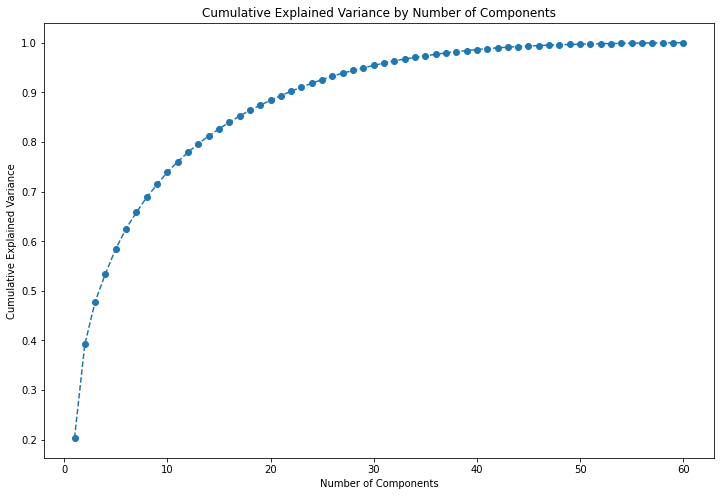

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(
    range(1, len(evr)+1),
    evr.cumsum(),
    marker="o",
    linestyle="--",
)
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show();

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 13 components.

Next, we perform PCA with the chosen number of components

In [17]:
# Feature extraction
pca = PCA(n_components=13)
pca_fit = pca.fit(X_std)

In [18]:
print(f"Explained Variance: {pca_fit.explained_variance_ratio_.sum()}")

Explained Variance: 0.7965179775011404
